## Esercizio 1

**Addestra un modello per prevedere il peso in base a età e sesso.**

1. **Trasforma il dizionario <code>data_dict</code> in un <code>pandas.DataFrame</code>**
2. **Dividi tra X e y, tenendo conto che <code>età</code> e <code>sesso</code> sono le variabili indipendenti, mentre il peso è la variabile target.**
3. **Istanzia un Percettrone**
4. **Addestra il modello**
5. **Crea un'osservazione aggiuntiva (simulando sia un dato mai visto dal modello) ed esegui un'inferenza**
6. **Stampa a schermo il peso previsto dal modello**.

In [7]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

data_dict = data = {
    'età': [5, 8, 12, 20, 35, 40, 50],
    'sesso': [0, 0, 1, 1, 0, 1, 0],  # 0: femmina, 1: maschio
    'peso': [20, 26, 40, 70, 80, 75, 86]
}


df = pd.DataFrame(data_dict)

X = df[['età','sesso']]
Y = df['peso']


#inizializzazione percettrone
modello = Perceptron()
modello.fit(X,Y)

prediction = modello.predict(X)



## Esercizio 2

**Individua correlazioni tra variabili.**

1. **Leggi il file csv dall'<code>url</code> sottostante**
2. **Ottieni la matrice di correlazione**
3. **Prevedi una visualizzazione della matrice di correlazione.**
4. **Ci sono variabili altamente correlate tra loro?**
5. **Ci sono valori mancanti?**
6. **Dividi i dati tra train e test, garantendo riproducibilità**
7. **Standardizza i dati nella maniera più idonea**
8. **Quale potrebbe essere la maniera migliore di bilanciare le classi?**

Potete trovare più informazioni sul dataset [qui](https://archive.ics.uci.edu/dataset/186/wine+quality)



matrice correlazione :                        fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur diox

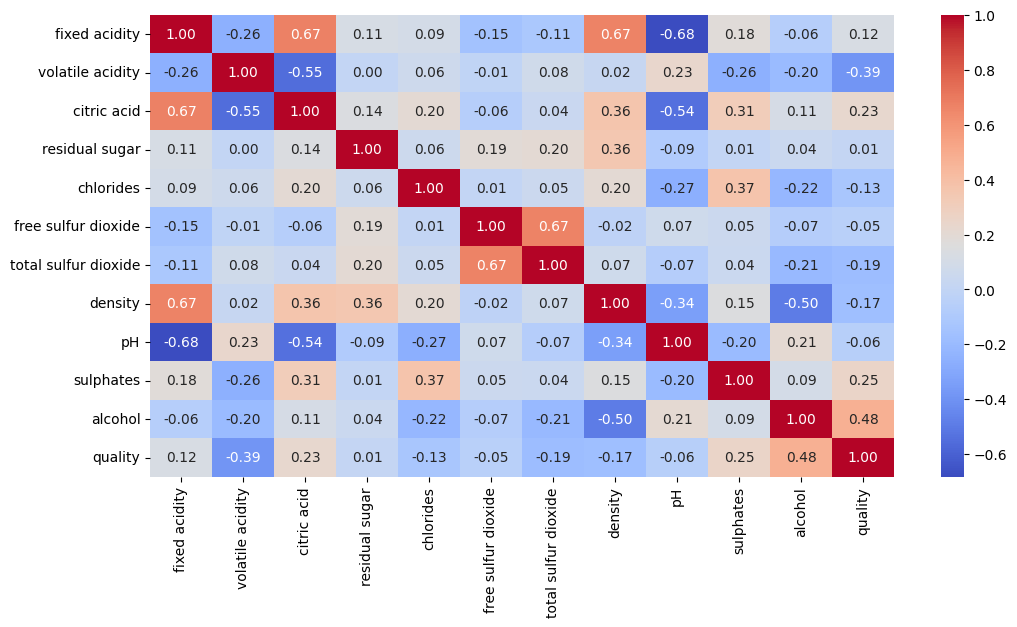

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

data = pd.read_csv(url,sep=';')
#print(data.head())

correlazione = data.corr(numeric_only=True)
print("matrice correlazione : ",correlazione)

plt.figure(figsize=(12,6))
sns.heatmap(correlazione,cmap='coolwarm',fmt='.2f',annot=True)

#correlate tra loro
thresh = 0.5

correlato = correlazione[(correlazione > thresh) | (correlazione < thresh)]

print("\nDATI CORRELATI\n ",correlato)

#missing val

print("\nDATI NULLI :\n ",data.isnull().sum())

#train test 

x_train_val, x_test, y_train_val, y_test = train_test_split(
    data.iloc[:,:-1],
    data.iloc[:,-1],
    test_size=0.2,
    random_state=42,
)

x_train_val, x_val, y_train_val, y_val = train_test_split(
    x_train_val,
    y_train_val,
    test_size=0.2,
    random_state=42,
)

#standardizz

scaler = StandardScaler()

x_scaled_train = scaler.fit_transform(x_train_val)
x_scaled_test = scaler.fit_transform(x_test)




## Esercizio 3

- **Leggi il dataset contenuto nel file <code>[Crop_recommentation](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).csv</code>**
- **Ottieni il numero di classi uniche presenti e mettile in un insieme chiamato <code>class_names</code>.**
- **Ottieni la matrice di correlazione e offrine una visualizzazione. Ci sono variabili altamente correlate tra loro?**
- **Codifica nella maniera opportuna la colonna <code>label</code>.**
- **Dividi i dati tra train e test, <u>garantendo riproducibilità</u>. Il test_set deve corrispondere al 25% dei dati, comprendendo la stessa proporzione di classi tra train e test**
- **Standardizza i dati nella maniera più opportuna.**



    


## Esercizio 4

- **Leggi il dataset contenuto nell'<code>url</code>.**
- **Attenzione! Il dataset contiene dei valori nulli che sono codicati col valore '?'. Usa il parametro opportuno di <code>[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)</code> per marcare correttamente i valori nulli.**
- **Controlla quanti valori mancanti ci sono e scarta le variabili che hanno più del $50$% di valori nulli**.
- **Usa il <code>[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)</code> per imputare correttamente i dati mancanti nelle variabili numeriche (utilizza la media) e in quelle categoriche (utilizza il valore più frequente).** 
- **Codifica nella maniera più opportuna le variabili categoriche**.
- **Controlla se ci sono variabili altamente correlate** 
- **Le label hanno bisogno di essere preprocessate? Se sì, adotta la tecnica che più ti sembra sensata**.
- **Assicurati che le classi non siano sbilanciate e usa un'opportuna tecnica per poterle bilanciare (ma fallo dopo aver diviso e standardizzato i dati!)**
- **Dividi i dati tra train e test, assicurandoti che lo split sia riproducibile e che la proporzione tra train e test sia la stessa tra le due partizioni**
- **Standardizza i dati delle variabili numeriche nella maniera più opportuna.**

In [56]:


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"

column_names = [
    "class", "age", "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
    "sick", "pregnant", "thyroid_surgery", "I131_treatment", "query_hypothyroid",
    "query_hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych",
    "TSH_measured", "TSH", "T3_measured", "T3", "TT4_measured", "TT4", "T4U_measured",
    "T4U", "FTI_measured", "FTI", "TBG_measured", "TBG", "referral_source"
]





## Esercizio 5


1. **Import e caricamento dati <code>Breast_Cancer_Wisconsin</code> tramite il modulo <code>dataset</code>di <code>scikit-learn</code>**

    - Caricare il dataset

    - Esplorare la struttura: features, target, shape

    - Creare un DataFrame per una migliore leggibilità

2. **Esplorazione dati (EDA)**

    - Descrivere statisticamente le feature

    - Verificare valori nulli

    - Visualizzare distribuzioni

    - Correlazioni tra feature
        - Quale potrebbe essere un modo per eliminare le feature altamente correlate?

3. **Suddividere in features X e target y**

    - Normalizzare o standardizzare i dati
        - Se sei riuscito a rimuovere le feature correlate valuta se sia necessario farlo

    - Suddividere il dataset in train/test 

4. **Creazione del modello**

    - Istanzia un modello <code>Perceptron</code>

5. **Calcolo dell'accuratezza**

    - Valutazione del modello